# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

To identify the most important features that can predict the price of a car with the lowest mean squared error (MSE) possible.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [60]:
# pd.options.display.float_format = '{:.2f}'.format # Formats all floats with 2 decimal places
# pd.options.display.float_format = '{:,}'.format # Adds comma as a thousands separator
# pd.options.display.float_format = '{:,.2f}'.format # Combines both

In [61]:
# Load the dataset
df = pd.read_csv('data/vehicles.csv')

# Display the first few rows of the dataframe
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Exploring numerical features

In [63]:
### Drop categorical features
cat_features = df.select_dtypes(include=['object']).columns
df_numeric = df.drop(cat_features, axis=1)

In [64]:
df_numeric.head()

,id,price,year,odometer
0,7222695916,6000,NaN,NaN
1,7218891961,11900,NaN,NaN
2,7221797935,21000,NaN,NaN
3,7222270760,1500,NaN,NaN
4,7210384030,4900,NaN,NaN


In [65]:
# Drop the 'id' column as it does not provide any useful information for analysis
df_numeric.drop('id', axis=1, inplace=True)

In [66]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   price     426880 non-null  int64  
 1   year      425675 non-null  float64
 2   odometer  422480 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.8 MB


In [67]:
df_numeric.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [68]:
# We don't care about samples where price is 0. Replace zeros with NaNs
df_numeric.replace(0, np.nan, inplace=True)

In [69]:
df_numeric.describe()

,price,year,odometer
count,3.939850e+05,425675.000000,4.205150e+05
mean,8.147763e+04,2011.235191,9.850147e+04
std,1.268064e+07,9.452120,2.142754e+05
min,1.000000e+00,1900.000000,1.000000e+00
25%,7.000000e+03,2008.000000,3.834700e+04
50%,1.500000e+04,2013.000000,8.600000e+04
75%,2.759000e+04,2017.000000,1.340000e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [70]:
# Display basic information about the dataframe
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   price     393985 non-null  float64
 1   year      425675 non-null  float64
 2   odometer  420515 non-null  float64
dtypes: float64(3)
memory usage: 9.8 MB


Check the proprtion of missing values

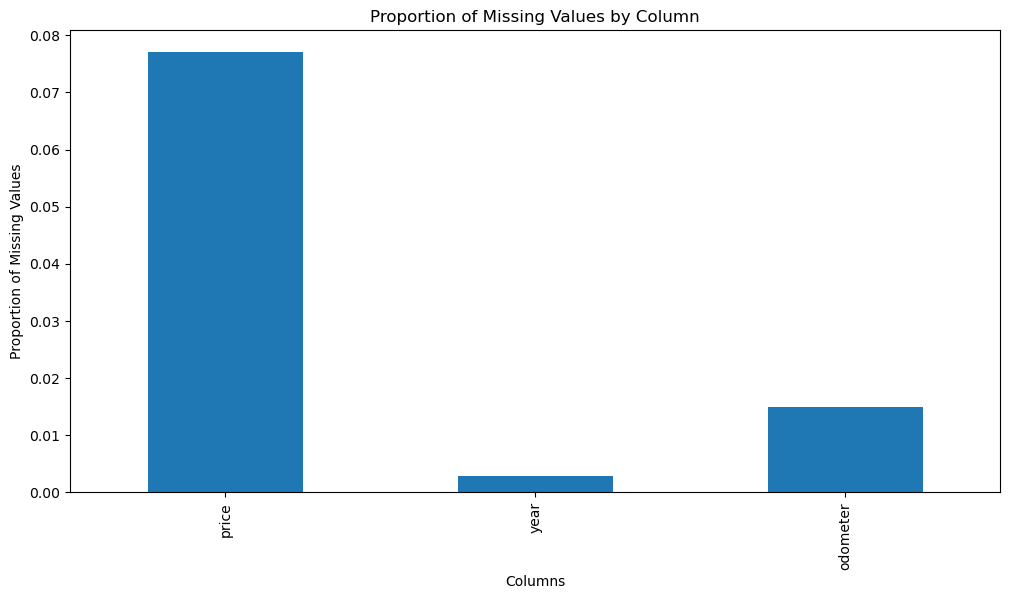

In [71]:

# Calculate the proportion of missing values for each column
missing_values = df_numeric.isnull().mean()

# Plot the missing values
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Proportion of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Proportion of Missing Values')
plt.show()

Proportion of missing values in numeric features is very low. It is safe to drop these samples.

Check the distribuitions and use boxplots to spot potential outliers.

price
Skew : 254.41


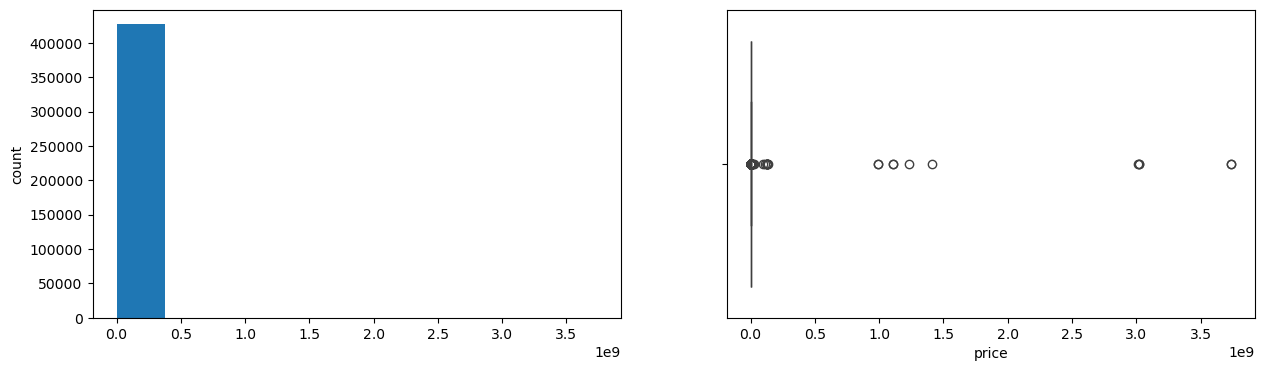

year
Skew : -3.58


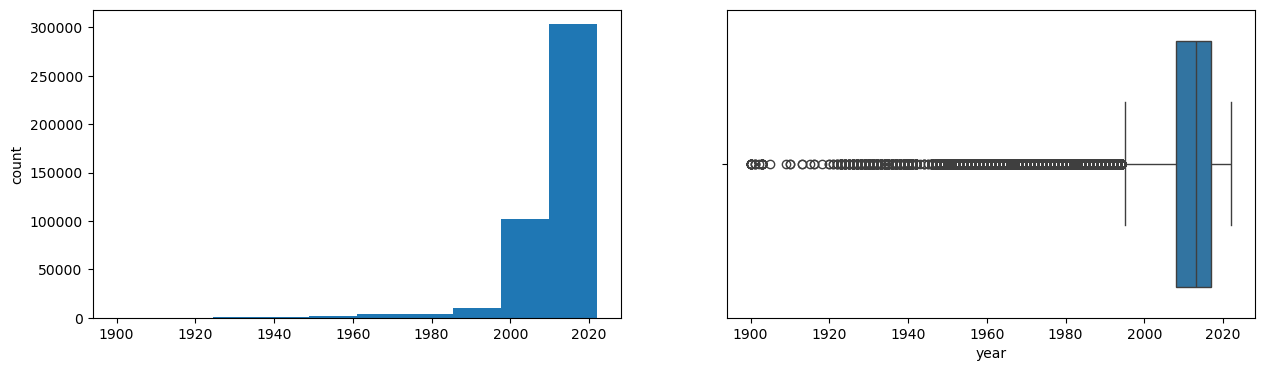

odometer
Skew : 38.04


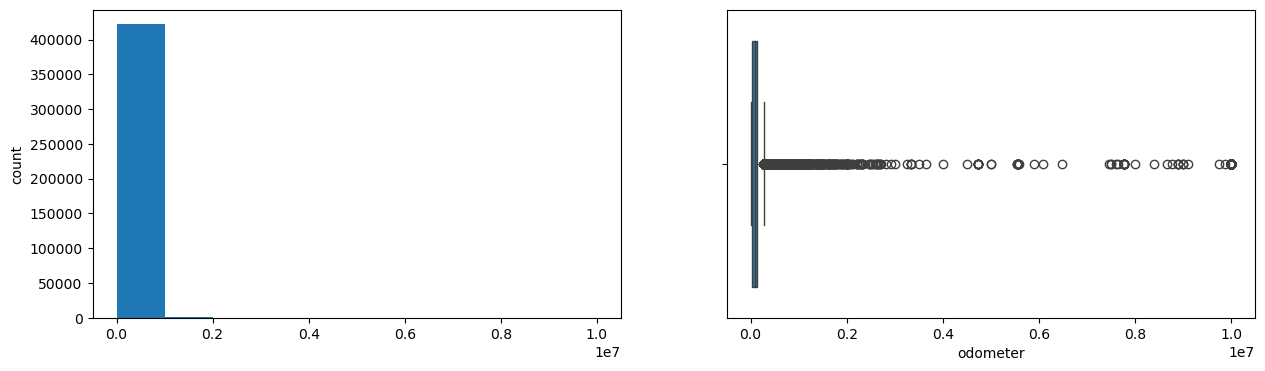

In [72]:
# Check the histogram and boxplot for each numerical feature
num_cols = df_numeric.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

Removing outliers from the price feature

In [73]:
df = df[df['price'] < 500000]

price
Skew : 2.15


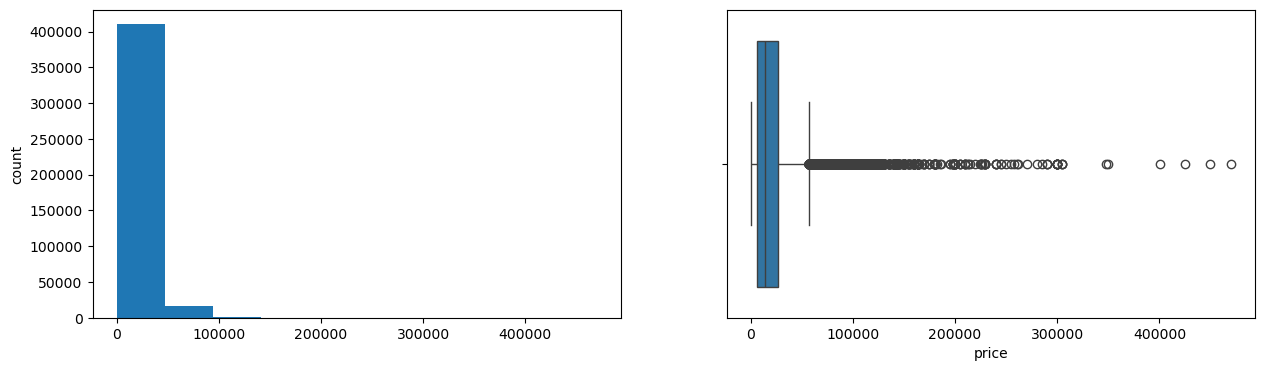

In [74]:
col = 'price'
print(col)
print('Skew :', round(df[col].skew(), 2))
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
df[col].hist(grid=False)
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x=df[col])
plt.show()

#### Checking for duplicate data

In [75]:
# Check for duplicates in the VIN column
duplicates = df['VIN'].duplicated().sum()
print(f"Number of duplicate VINs: {duplicates}")

Number of duplicate VINs: 308570


In [76]:
# Drop rows with duplicate VINs
df.drop_duplicates(subset='VIN', inplace=True)

In [77]:
# Check for outliers in odometer
df[df['odometer'] >= 9999999].sort_values('odometer', ascending=False)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
103798,7303067734,ocala,6500,1978.0,NaN,1978 van,good,8 cylinders,gas,10000000.0,clean,automatic,E27HHBD1806,rwd,NaN,truck,NaN,fl
328533,7311553545,erie,600,1981.0,ford,f-150,fair,8 cylinders,gas,9999999.0,clean,manual,1FTPW14545FA67066,rwd,full-size,truck,blue,pa
334534,7310467117,philadelphia,2946,1964.0,buick,wagon,fair,8 cylinders,gas,9999999.0,clean,manual,1K7040242,rwd,full-size,wagon,grey,pa
353492,7308780336,cookeville,5000,1970.0,chevrolet,c10 cst,fair,8 cylinders,gas,9999999.0,clean,automatic,CE140S111528,rwd,full-size,pickup,NaN,tn
355243,7311420685,knoxville,2650,1999.0,buick,regal gse,good,6 cylinders,gas,9999999.0,clean,automatic,2G4WF5217X1621015,fwd,NaN,sedan,black,tn
366312,7310822876,austin,2999,1977.0,mazda,rx-4,NaN,NaN,gas,9999999.0,clean,manual,LA23W136168,NaN,NaN,NaN,NaN,tx


In [78]:
# Drop rows with odometer values greater than 9999999
df = df[df['odometer'] < 9999999]

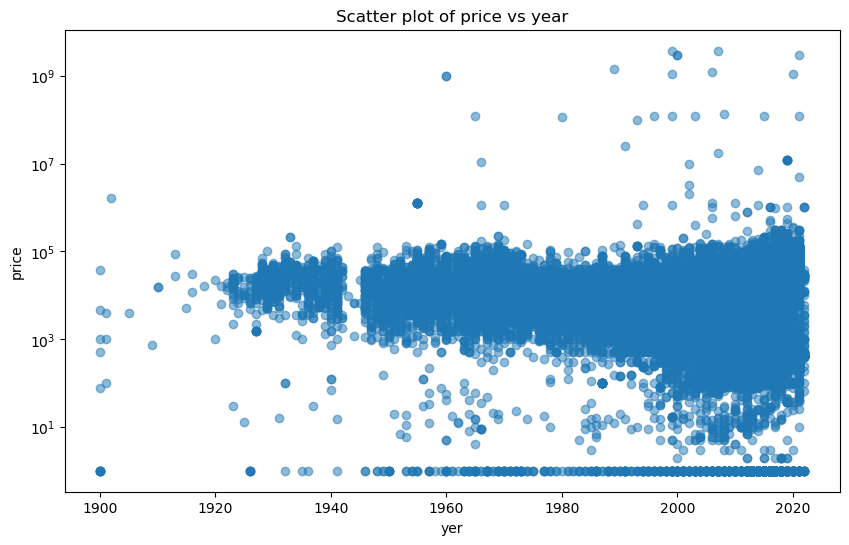

In [79]:
plt.figure(figsize=(10, 6))
# plt.scatter(df_numeric['year'][(df_numeric['price'] > 5100) & (df_numeric['price'] < 5500) & (df_numeric['year'] >= 2000) & (df_numeric['year'] <= 2020)], df_numeric['price'][(df_numeric['price'] > 5100) & (df_numeric['price'] < 5500) & (df_numeric['year'] >= 2000) & (df_numeric['year'] <= 2020)], alpha=0.5)
plt.scatter(df_numeric['year'], df_numeric['price'], alpha=0.5)
plt.title(f'Scatter plot of {'price'} vs {'year'}')
plt.xlabel('yer')
plt.ylabel('price')
plt.yscale('log')
plt.show()

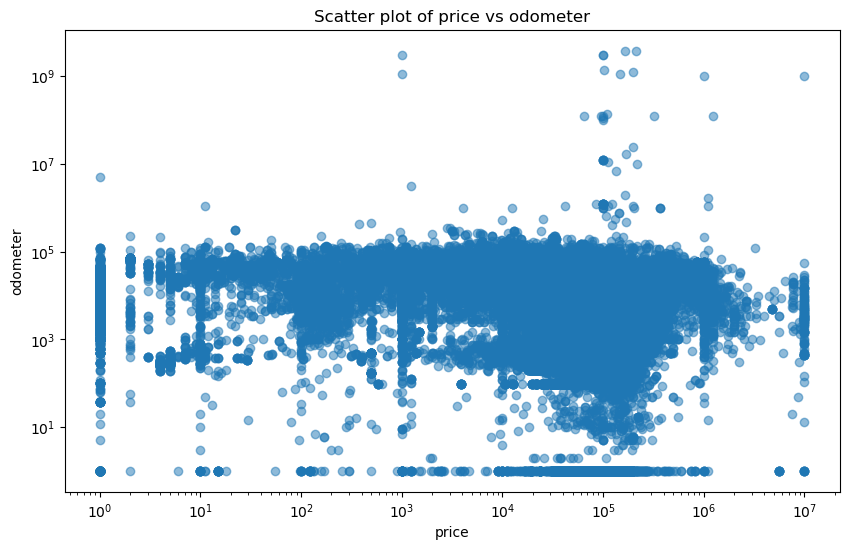

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(df_numeric['odometer'], df_numeric['price'], alpha=0.5)
plt.title(f'Scatter plot of {'price'} vs {'odometer'}')
plt.xlabel('price')
plt.xscale('log')
plt.ylabel('odometer')
plt.yscale('log')
plt.show()

In [81]:
# Check the unique values of the categorical features
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print(col)
    print(df[col].unique())
    print()

region
['auburn' 'birmingham' 'dothan' 'florence / muscle shoals'
 'gadsden-anniston' 'huntsville / decatur' 'mobile' 'montgomery'
 'tuscaloosa' 'anchorage / mat-su' 'fairbanks' 'kenai peninsula'
 'southeast alaska' 'flagstaff / sedona' 'mohave county' 'phoenix'
 'prescott' 'show low' 'sierra vista' 'tucson' 'yuma' 'fayetteville'
 'fort smith' 'jonesboro' 'little rock' 'texarkana' 'bakersfield' 'chico'
 'fresno / madera' 'gold country' 'hanford-corcoran' 'humboldt county'
 'imperial county' 'inland empire' 'los angeles' 'mendocino county'
 'merced' 'modesto' 'monterey bay' 'orange county' 'palm springs'
 'redding' 'reno / tahoe' 'sacramento' 'san diego' 'san luis obispo'
 'santa barbara' 'santa maria' 'SF bay area' 'siskiyou county' 'stockton'
 'susanville' 'ventura county' 'visalia-tulare' 'yuba-sutter' 'boulder'
 'colorado springs' 'denver' 'eastern CO' 'fort collins / north CO'
 'high rockies' 'pueblo' 'western slope' 'eastern CT' 'hartford'
 'new haven' 'northwest CT' 'washington, 

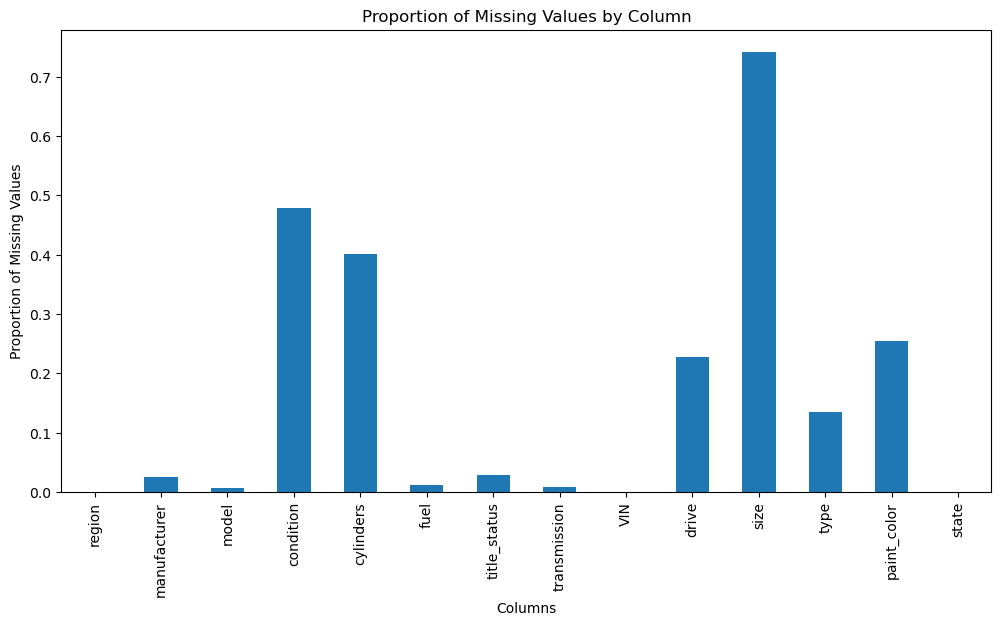

In [82]:
# Calculate the proportion of missing values for each column for categorical features
cat_features = df.select_dtypes(include=['object']).columns
missing_values = df[cat_features].isnull().mean()

# Plot the missing values
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Proportion of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Proportion of Missing Values')
plt.show()

In [83]:
# Drop innecesary columns
df.drop(['id', 'VIN', 'cylinders', 'size', 'paint_color', 'model', 'type', 'region', 'state','condition'], axis=1, inplace=True)

In [84]:
# Check for null values
df.isnull().sum()

price               0
year              592
manufacturer     3015
fuel             1303
odometer            0
title_status     3306
transmission      873
drive           26579
dtype: int64

In [85]:
# Fill year with the mode
df['year'].fillna(df['year'].mode()[0], inplace=True)

/var/folders/zq/d3_0gwx57y180njnmmk8bfb80000gn/T/ipykernel_61284/4246241357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(df['year'].mode()[0], inplace=True)


In [86]:
# Fill categorical features with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/zq/d3_0gwx57y180njnmmk8bfb80000gn/T/ipykernel_61284/353642336.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [87]:
# Encode categorical features
df = pd.get_dummies(df, drop_first=True)

In [88]:
df

,price,year,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,drive_fwd,drive_rwd
27,33590,2014.0,57923.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
28,22590,2010.0,71229.0,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
29,39590,2020.0,19160.0,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
30,30990,2017.0,41124.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32,27990,2012.0,68696.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426682,17873,2018.0,501.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426727,4500,2006.0,163837.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426737,2500,2005.0,185000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
426746,17950,2004.0,186000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define the pipeline steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the data
    # ('poly', PolynomialFeatures(degree=2)),  # Step 2: Add non-linearity
    # ('pca', PCA(n_components=0.95)),  # Step 2: Reduce dimensionality
    # ('feature_selection', SelectKBest(score_func=f_regression, k=10)),  # Step 3: Select top 10 features
    ('regressor', LinearRegression())  # Step 4: Train a linear regression model
])

X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [114]:
# Check the model mse
# Calculate MSE and RMSE
from sklearn.metrics import mean_squared_error

y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 162801838.41325277
Root Mean Squared Error: 12759.382368016595


In [115]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"Cross-Validated RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

Cross-Validated RMSE: 12810.491803775303 ± 666.8353051710793


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.